                                CLEANING OF 2019 STARTUP FUNDING DATASET

In [1]:
#We need to import necessary libraries to aid in Data Analysis and Visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import fuzzywuzzy

In [2]:
#loading of the csv dataset using the read_csv method.
data = pd.read_csv("startup_funding2019 (clean_data).csv", encoding='latin-1')


                                           DATA EXPLORATION

In [3]:

#Preview of the first five data using head() method.

df = data.head(10)

df

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.","$1,000,000",Pre series A
8,Quantiphi,NaN,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,"$20,000,000",Series A
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,"$275,000,000",Series G


In [4]:
#Preview of dataset summary information using info method.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What_it_does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount         89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [5]:
#View of number of rows and columns in 2019 dataset
num_f_colmns = data.shape[(1)]
num_f_rows = data.shape[(0)]

print('Number of rows in 2019 dataset:',num_f_rows)
print('Number of columns in 2019 dataset:',num_f_colmns)

Number of rows in 2019 dataset: 89
Number of columns in 2019 dataset: 9


In [6]:
# Preview of description summary of numerical columns using describe method

data.describe()

,Founded
count,60.000000
mean,2014.533333
std,2.937003
min,2004.000000
25%,2013.000000
50%,2015.000000
75%,2016.250000
max,2019.000000


In [7]:
# Preview of description summary of categorical columns using describe method
data.describe(include=object)

,Company_Brand,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
count,89,70,84,89,86,89,89,43
unique,87,17,52,88,85,86,50,15
top,Kratikal,Bangalore,Edtech,Online meat shop,"Vivek Gupta, Abhay Hanjura",Undisclosed,Undisclosed,Series A
freq,2,21,7,2,2,3,12,10


In [8]:
#Let us check for duplicates in our datas
duplicate_vals = data.duplicated().sum()

#The 2019 dataset has no duplicate values

print("Count of duplicate values:",duplicate_vals)

Count of duplicate values: 0


In [9]:
#Check of number of missing values in our dataset.(i.e Total NAN values per column)
missin_vals = data.isnull().sum()

#The 2019 dataset contains missing values

missin_vals

Company_Brand     0
Founded          29
HeadQuarter      19
Sector            5
What_it_does      0
Founders          3
Investor          0
Amount            0
Stage            46
dtype: int64

In [10]:
#conversion of missing value as percentage to enable comparison and inference
#we get total percentage of missing data in each column
#gives inference of whether to delete data or not

missing_percent = (data.isnull().sum()/len(data)) * 100

missing_percent

Company_Brand     0.000000
Founded          32.584270
HeadQuarter      21.348315
Sector            5.617978
What_it_does      0.000000
Founders          3.370787
Investor          0.000000
Amount            0.000000
Stage            51.685393
dtype: float64

In [11]:
#Boolean filtering of percentage missing data greater than 0 in columns
#only columns selected have missing percentage > 0

def missing_percent(table):
    missing_percent = (data.isnull().sum()/len(data)) * 100
    missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
    return missing_percent

In [12]:
# per_nan = percentage nan

per_nan = missing_percent(data)

per_nan

Stage          51.685393
Founded        32.584270
HeadQuarter    21.348315
Sector          5.617978
Founders        3.370787
dtype: float64

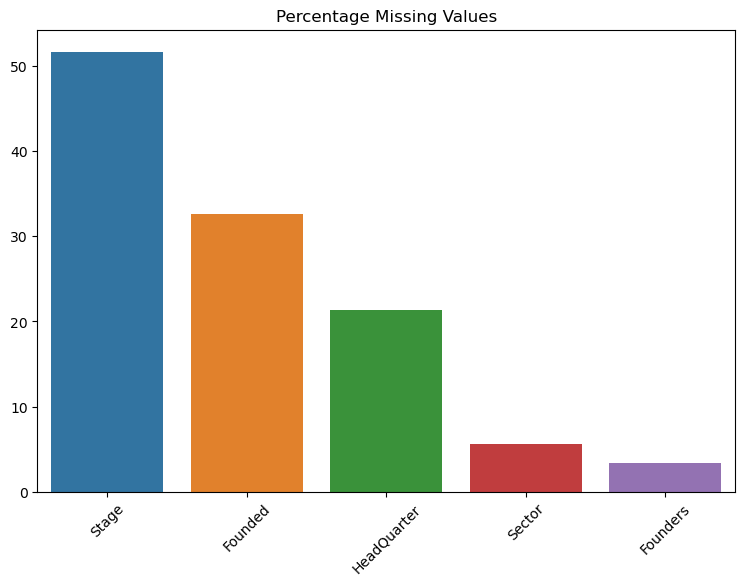

In [13]:
#Let us visualize to infer missing data for comprehensive understanding
#NBper_nan is a series data that is indexed(with only one column)
#NBseaborn and matplotlib are compatible, we'll us matplotlib's 'plt.xticks()' to do x-axis rotation 

plt.figure(figsize=(9, 6))
sns.barplot(x=per_nan.index, y=per_nan)
plt.xticks(rotation = 45)
plt.title("Percentage Missing Values");
#plt.ylim(3, 21)
#to get columns with missing data btwn 3 to 21 percentage, we use function 'plt.ylim()'

In [14]:
#A look at categorical column 'stage' value distribution.
data["Stage"].value_counts()


#Column has inconsistencies

Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: Stage, dtype: int64

                                                DATA CLEANING

In [15]:
#Handing inconsistencies in 'Amount' column
# Remove dollar sign, and convert the "amount" column from integer to float
data['Amount'] = data['Amount'].str.replace('[$,]', '', regex=True) 

#Replace "undisclosed" with NaN
data['Amount'] = data['Amount'].replace('Undisclosed', np.nan)

#Preview of modified 'Amount' column
data['Amount'].head()

0      6300000 
1    150000000 
2     28000000 
3     30000000 
4      6000000 
Name: Amount, dtype: object

In [16]:
# Let us find out count of missing values in 'Amount' column
missin_amount_vals = data["Amount"].isna().sum()

print("Count of missing values in Amount column:",missin_amount_vals)

Count of missing values in Amount column: 12


In [17]:
#let us confirm count of Non-NA elements in column the 'amount'
#DataFrame.count() method returns count of non-Non-NA/null entries

Non_NA = data["Amount"].count()

print("Count of non-NA elements in Amount column:",Non_NA)

Count of non-NA elements in Amount column: 77


In [18]:
#Convert the column to numeric, coercing non-numeric values to NaN:
#pd.to_numeric() converts values to float

data["Amount"] = pd.to_numeric(data["Amount"], errors='coerce')

#Calculate the median of the column, ignoring the NaN values:
median_value = data["Amount"].median(skipna=True)

median_value

6000000.0

In [19]:
#Replace the NaN values with the calculated median:
data["Amount"].fillna(median_value, inplace=True)

In [20]:
#confirm whether there are any NAN values (missing_values)
data["Amount"].isna().values.any()

False

In [21]:
#let us clean column named 'founded' 
#we will fill in missing values with the median value
elements = data["Founded"].unique()
elements

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008.])

In [22]:
#Count of missing values in column 'founded'

missn_vals = data["Founded"].isna().sum()
missn_vals 
print("Count of missing values in Founded column:",missn_vals)

Count of missing values in Founded column: 29


In [23]:
#Convert the column to numeric, coercing non-numeric values to NaN:
#pd.to_numeric() converts values to float

data["Founded"] = pd.to_numeric(data["Founded"], errors='coerce')

#Calculate the median of the column, ignoring the NaN values:
median_value = data["Founded"].median(skipna=True)

median_value

2015.0

In [24]:
#Replace the NaN values with the calculated median:
data["Founded"].fillna(median_value, inplace=True)

In [25]:
#Any missing values?
#confirm whether there are any NAN values (missing_values)
data["Founded"].isna().values.any()

False

In [26]:
#we will clean column 'Headquarter'
#We will fill up missing values with the mode(most occuring instance)

#Let us use unique() method to examine the unique values:
print(df['HeadQuarter'].unique())



[nan 'Mumbai' 'Chennai' 'Telangana' 'Pune' 'Bangalore' 'Noida' 'Delhi']


In [27]:
data["HeadQuarter"].head(5)

0          NaN
1       Mumbai
2       Mumbai
3      Chennai
4    Telangana
Name: HeadQuarter, dtype: object

In [28]:
#Calculate the mode of the column:
#The iloc indexer is used to retrieve the first value from the mode result.
#The mode() function returns a pandas Series object that contains the mode(s) of the column.

mode_value = data["HeadQuarter"].mode().iloc[0]

mode_value

'Bangalore'

In [29]:
#Replace the missing values with the mode:
data["HeadQuarter"].fillna(mode_value, inplace=True)


In [30]:
#Any missing values?
#Let us confirm whether there are any NAN values after changes
data["HeadQuarter"].isna().values.any()

False

In [31]:
#Let us clean column 'sector' 
#Column has inconsistencies and some elements needs to be renamed to have consistent format
#Let us use unique() method to examine the unique values:
print(data["Sector"].unique())

['Ecommerce' 'Edtech' 'Interior design' 'AgriTech' 'Technology' 'SaaS'
 'AI & Tech' 'E-commerce' 'E-commerce & AR' 'Fintech' 'HR tech'
 'Food tech' 'Health' 'Healthcare' 'Safety tech' 'Pharmaceutical'
 'Insurance technology' 'AI' 'Foodtech' 'Food' 'IoT' 'E-marketplace'
 'Robotics & AI' 'Logistics' 'Travel' 'Manufacturing' 'Food & Nutrition'
 'Social Media' nan 'E-Sports' 'Cosmetics' 'B2B' 'Jewellery'
 'B2B Supply Chain' 'Games' 'Food & tech' 'Accomodation' 'Automotive tech'
 'Legal tech' 'Mutual Funds' 'Cybersecurity' 'Automobile' 'Sports'
 'Healthtech' 'Yoga & wellness' 'Virtual Banking' 'Transportation'
 'Transport & Rentals' 'Marketing & Customer loyalty' 'Infratech'
 'Hospitality' 'Automobile & Technology' 'Banking']


In [32]:
#Check of counts of each category in the column
data["Sector"].value_counts().sort_values(ascending=False)


Edtech                          7
Fintech                         5
AgriTech                        4
Technology                      4
SaaS                            4
Automobile                      3
E-commerce                      3
Logistics                       3
IoT                             2
E-marketplace                   2
AI                              2
Automotive tech                 2
Accomodation                    2
Foodtech                        2
Food                            2
Pharmaceutical                  1
Interior design                 1
AI & Tech                       1
E-commerce & AR                 1
HR tech                         1
Food tech                       1
Health                          1
Healthcare                      1
E-Sports                        1
B2B                             1
Insurance technology            1
Robotics & AI                   1
Travel                          1
Manufacturing                   1
Social Media  

In [33]:
#Creation of a function to attain consistency in names of elements

from fuzzywuzzy import fuzz

def rename_similar_names(data, Sector):
    # Create a copy of the dataframe to avoid modifying the original data
    dff = data.copy()

     # Convert values in the specified column to strings
    dff[Sector] = dff[Sector].astype(str)

    # Iterate over each unique value in the specified column
    for value in dff[Sector].unique():
        similar_names = [name for name in dff[Sector].unique() if fuzz.ratio(value, name) >= 80]
        # Identify similar names with a similarity ratio of at least 80
        
        if len(similar_names) > 1:
            # If there are multiple similar names, choose a consistent name for all of them
            consistent_name = min(similar_names, key=len)  # You can change the selection criteria as per your preference
            
            # Replace the similar names with the consistent name
            dff[Sector].replace(similar_names, consistent_name, inplace=True)

    return dff


In [34]:
# Rename similar names in the 'Sector' column
df_cleaned = rename_similar_names(data, "Sector")

#check of unique elements after renaming our columns
print(df_cleaned["Sector"].unique())

['Ecommerce' 'Edtech' 'Interior design' 'AgriTech' 'Technology' 'SaaS'
 'AI & Tech' 'Fintech' 'HR tech' 'Foodtech' 'Health' 'Healthcare'
 'Safety tech' 'Pharmaceutical' 'Insurance technology' 'AI' 'Food' 'IoT'
 'E-marketplace' 'Robotics & AI' 'Logistics' 'Travel' 'Manufacturing'
 'Food & Nutrition' 'Social Media' 'nan' 'Sports' 'Cosmetics' 'B2B'
 'Jewellery' 'B2B Supply Chain' 'Games' 'Accomodation' 'Automotive tech'
 'Legal tech' 'Mutual Funds' 'Cybersecurity' 'Automobile' 'Healthtech'
 'Yoga & wellness' 'Virtual Banking' 'Transportation'
 'Transport & Rentals' 'Marketing & Customer loyalty' 'Infratech'
 'Hospitality' 'Automobile & Technology' 'Banking']


In [35]:
# Count of unique elements in column after removing inconsistencies
df_cleaned["Sector"].value_counts().sort_values(ascending=False)

Edtech                          7
Fintech                         5
nan                             5
Ecommerce                       5
AgriTech                        4
Technology                      4
SaaS                            4
Foodtech                        4
Automobile                      3
Logistics                       3
E-marketplace                   2
AI                              2
IoT                             2
Accomodation                    2
Sports                          2
Automotive tech                 2
Food                            2
AI & Tech                       1
HR tech                         1
Health                          1
Healthcare                      1
Safety tech                     1
Insurance technology            1
Jewellery                       1
Robotics & AI                   1
Travel                          1
Manufacturing                   1
Food & Nutrition                1
Cosmetics                       1
B2B           

In [36]:
 #isnull() functions won't detect nan as missing values because they are treated as regular string values
# Convert 'nan' strings to NaN values in 'Sector'
df_cleaned["Sector"] = df_cleaned['Sector'].replace('nan', np.nan)

In [37]:
#Count of NAN values in sector
nan_values = df_cleaned["Sector"].isna().sum()
nan_values

5

In [38]:
#Calculate mode of the column
mode_value = df_cleaned["Sector"].mode().iloc[0]

mode_value

'Edtech'

In [39]:
#Replace the missing values with the mode:
df_cleaned["Sector"].fillna(mode_value, inplace=True)


In [40]:
#Any missing values?
#Let us confirm whether there are any NAN values after changes
df_cleaned["Sector"].isna().values.any()

False

In [41]:
#Let us clean 'Founders' column

# View NaN values in 'Founders'
nan_val = df_cleaned[df_cleaned["Founders"].isna()]
nan_val

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
39,Lil Goodness and sCool meal,2015.0,Bangalore,Food & Nutrition,It empowers moms to provide the best of foods ...,NaN,"Sajan Pillai, Muthu Krishnan,",400000.0,NaN
41,VMate,2015.0,Bangalore,Edtech,A short video platform,NaN,Alibaba,100000000.0,NaN
71,Smart Institute,2015.0,Surat,Edtech,A platform to learn online,NaN,HNI investors,1500000.0,NaN


In [42]:
# Replace missing values with "Unknown" in the 'Founders' column
df_cleaned['Founders'] = df_cleaned['Founders'].fillna("Unknown")

#Any missing values?
#Let us confirm whether there are any NAN values after changes
df_cleaned["Founders"].isna().values.any()

False

In [43]:
#Let us clean 'stage' colum
# Will finish cleaning up this column tomorrow
df_cleaned['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)